In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

In [2]:
# if not os.path.exists("Figures"):
#     os.mkdir("Figures")

# NNAntisparse Correlated

In [3]:
df_nnanti_results = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV2.pkl").iloc[:int(9*7*100)]
print('Shape : {}'.format(df_nnanti_results.shape))
print('Number of diverge cases for CorInfoMax is : ')
print(df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# df_nnanti_results.iloc[-20:]

Shape : (6300, 13)
Number of diverge cases for CorInfoMax is : 
0


In [4]:
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results
table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

,rho,CorInfoMax,CorInfoMax2,OnlineBCA,NSM,ICA,LDMI,PMF
0,0.0,27.244685,27.871744,28.165488,29.542237,23.838138,31.393648,29.839121
1,0.1,27.502785,27.967012,28.172274,23.140114,19.949051,31.372895,29.950132
2,0.2,27.486791,27.884511,27.885992,17.568544,15.730983,31.521691,29.732986
3,0.3,27.322740,27.598665,27.469186,13.714490,12.771990,31.453127,29.592594
4,0.4,27.581375,27.589904,27.522128,10.876288,10.530696,31.975688,30.025220
5,0.5,27.032967,26.826423,26.417667,8.194453,8.563726,31.661239,29.497131
6,0.6,26.492704,25.991164,25.302152,5.700218,6.825230,31.538139,29.453701
7,0.7,25.205596,23.914650,22.651065,4.359822,3.698915,31.455187,29.206181
8,0.8,20.803054,19.144516,17.670144,2.959925,3.995689,30.189740,28.046089


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


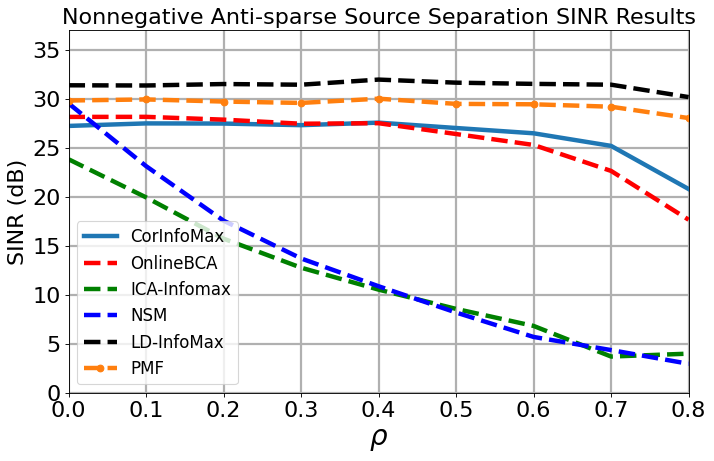

In [5]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRNSM,'b--',linewidth=4, label = "NSM")
plt.plot(rholist,SINRLDMI,'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
# plt.savefig('Figures/CorInfoMaxNNAntisparse_Correlated.pdf', format='pdf')

In [6]:
df_nnanti_results6 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV6.pkl")[['Model','rho', 'SINR']]
df_nnanti_results7 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV7.pkl")[['Model','rho', 'SINR']]
df_nnanti_results8 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV8.pkl")[['Model','rho', 'SINR']]
df_nnanti_results = pd.concat([df_nnanti_results6,df_nnanti_results7, df_nnanti_results8], axis = 0)

print('Shape : {}'.format(df_nnanti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'WSM')].shape[0])

df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (7272, 3)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  1


,rho,CorInfoMax,CorInfoMax2,OnlineBCA,WSM,NSM,ICA,LDMI,PMF
0,0.0,27.237386,27.888263,28.219358,24.088838,29.646316,23.920675,31.457875,29.910190
1,0.1,27.455646,27.993481,28.224780,23.841594,23.091752,19.932267,31.442456,29.936664
2,0.2,27.589513,27.943542,28.047207,24.084812,17.512705,15.761150,31.586103,29.890356
3,0.3,27.728737,27.922730,27.891794,24.105861,13.709542,12.822881,31.868820,30.002678
4,0.4,27.567777,27.433168,27.137081,23.552901,10.777046,10.500545,31.894656,29.765179
5,0.5,27.311022,27.182752,26.499832,23.151195,8.197990,8.577463,32.120565,29.717283
6,0.6,25.748190,25.424942,24.719953,21.942927,5.600301,6.819044,31.571185,29.210100
7,0.7,25.327150,24.174305,23.202219,20.097983,4.038107,3.680665,31.202979,29.036612
8,0.8,21.438772,19.004636,18.093436,18.646783,2.953141,4.000511,30.129976,28.149105


Shape : (7272, 3)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  1


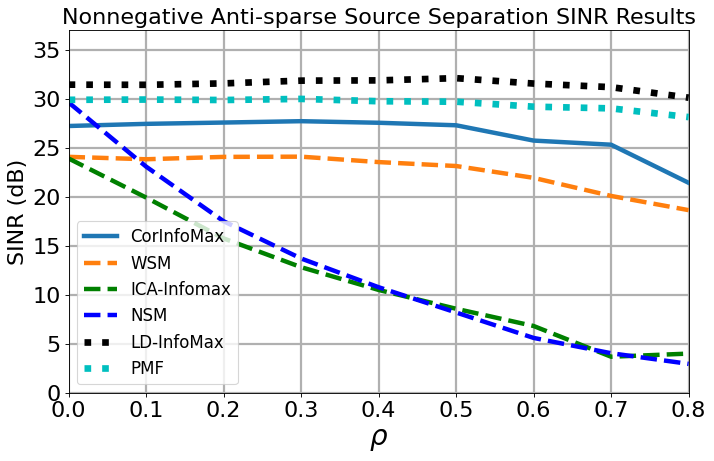

In [7]:
df_nnanti_results = pd.concat([
                               df_nnanti_results6, 
                               df_nnanti_results7, 
                               df_nnanti_results8
                              ],
                              axis = 0)
print('Shape : {}'.format(df_nnanti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'WSM')].shape[0])

df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()

SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()

rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
plt.plot(rholist,SINRWSM,'--', linewidth=4, label = "WSM")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
# plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRNSM,'b--',linewidth=4, label = "NSM")
plt.plot(rholist,SINRLDMI,'k:',linewidth=6, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF, 'c:', linewidth=6, label = "PMF")

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
# plt.savefig('Figures/CorInfoMaxNNAntisparse_CorrelatedV2.pdf', format='pdf')

# (Signed) Antisparse Correlated

In [8]:
df_anti_results = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV2.pkl").iloc[:int(9*7*100)]
print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for CorInfoMax is : ')
print(df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'CorInfoMax')].shape[0])
df_anti_results = df_anti_results.loc[(df_anti_results['SINR'] != -999)]

Shape : (6300, 13)
Number of diverge cases for CorInfoMax is : 
0


In [9]:
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
# results.loc[results['Model'] == 'CorInfoMax2']

table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

,rho,CorInfoMax,CorInfoMax2,OnlineBCA,BSM,ICA,LDMI,PMF
0,0.0,24.709056,24.044864,25.668309,25.370583,29.643275,29.479405,29.510854
1,0.1,24.781422,24.103222,25.551283,18.724845,21.523834,29.651073,29.549875
2,0.2,24.697136,23.927696,25.141833,13.685154,16.348270,28.798253,29.262811
3,0.3,24.170905,23.167890,24.405175,10.353487,13.109831,28.259328,28.794440
4,0.4,23.632991,22.761455,23.601887,7.914876,10.715336,28.257939,28.614109
5,0.5,23.257116,22.877828,23.026719,5.811517,8.729421,25.787159,28.206243
6,0.6,23.285941,22.703955,22.392018,3.957891,6.961358,23.832697,28.014322
7,0.7,22.323396,22.204172,21.017993,2.164253,3.564699,16.810293,26.995702
8,0.8,21.421071,21.469299,19.603393,0.253840,4.015459,9.736812,25.576452


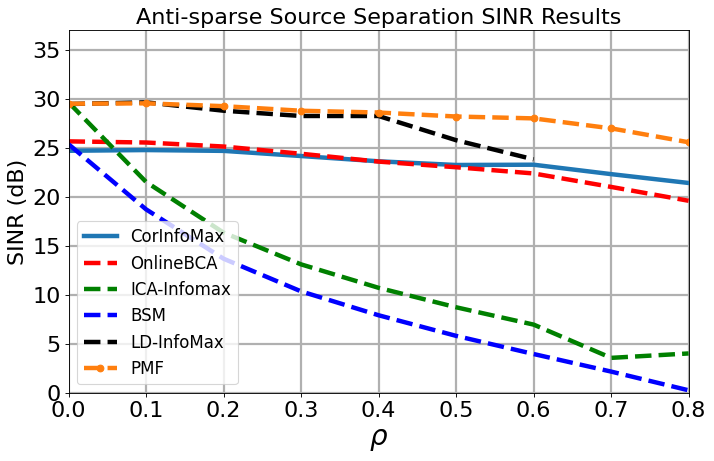

In [10]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
plt.plot(rholist[:7],SINRLDMI[:7],'k--',linewidth=4, label = "LD-InfoMax")
# plt.plot(rholist,SINRLDMI,'k--',linewidth=4, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'o--',linewidth=4, label = "PMF")
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
# plt.savefig('Figures/CorInfoMaxAntisparse_Correlated.pdf', format='pdf')

In [11]:
df_anti_results9 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV9.pkl")[['Model','rho', 'SINR']]
df_anti_results10 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV10.pkl")[['Model','rho', 'SINR']]

df_anti_results = pd.concat([
                               df_anti_results9, 
                               df_anti_results10, 
                              ],
                              axis = 0)
print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'WSM')].shape[0])

df_anti_results = df_anti_results.loc[df_anti_results['SINR'] != -999]
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (8100, 3)
Number of diverge cases for CorInfoMax is :  0
Number of diverge cases for WSM is :  0


,rho,CorInfoMax,CorInfoMax2,OnlineBCA,WSM,WSM2,BSM,ICA,LDMI,PMF
0,0.0,24.703374,23.902558,25.655478,24.871312,25.372120,25.232063,29.693654,29.610038,29.574738
1,0.1,24.615702,23.173236,25.109832,23.960698,23.929214,18.619671,21.437675,29.192171,29.058430
2,0.2,24.396445,23.592983,24.912822,22.919908,23.137919,13.603316,16.316352,28.924841,28.874704
3,0.3,24.263590,23.511449,24.520480,21.830388,22.615980,10.385423,13.125391,28.877623,28.999494
4,0.4,23.878461,23.641484,23.986604,22.086763,21.174475,7.867076,10.718316,27.649803,28.708178
5,0.5,23.637664,23.510770,23.097158,20.375314,20.525296,5.801607,8.735562,25.508689,28.477175
6,0.6,23.082509,22.768786,22.270792,18.834331,19.004570,3.965487,6.961816,22.104272,27.816962
7,0.7,22.608213,21.779834,21.097514,17.401983,17.258572,2.160217,3.947470,18.480093,27.157962
8,0.8,21.056254,21.196020,19.300168,13.657810,13.915143,0.265899,4.000899,10.046908,25.531170


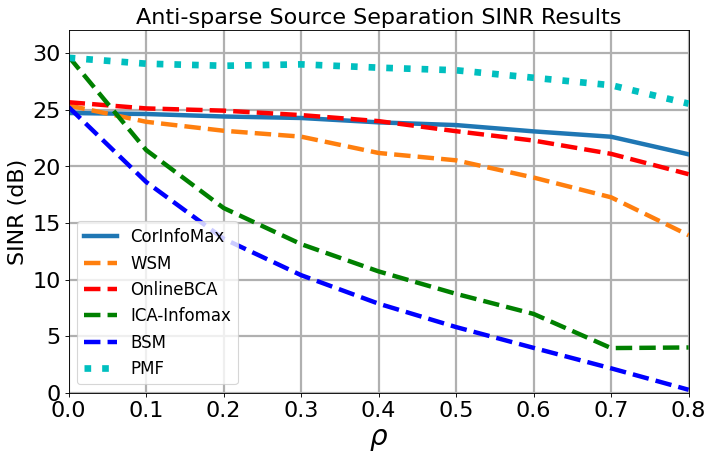

In [12]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
# SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()
SINRWSM2 = results.loc[results['Model'] == 'WSM2']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
# plt.plot(rholist,SINRWSM,'--', linewidth=4, label = "WSM")
plt.plot(rholist,SINRWSM2,'--', linewidth=4, label = "WSM")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
# plt.plot(rholist[:7],SINRLDMI[:7],'k:',linewidth=6, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'c:',linewidth=6, label = "PMF")
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,32])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
# plt.savefig('Figures/CorInfoMaxAntisparse_CorrelatedV2.pdf', format='pdf')

# (Signed) Antisparse Decrasing Correlation

In [13]:
df_anti_results1 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV3.pkl")[['Model','rho', 'SINR']]
df_anti_results2 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV4.pkl")[['Model','rho', 'SINR']]
df_anti_results3 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV5.pkl")[['Model','rho', 'SINR']]
df_anti_results = pd.concat([df_anti_results1,df_anti_results2, df_anti_results3], axis = 0)
print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for CorInfoMax is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'CorInfoMax')].shape[0])
print('Number of diverge cases for WSM is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'WSM')].shape[0])

df_anti_results = df_anti_results.loc[df_anti_results['SINR'] != -999]
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Shape : (10800, 3)
Number of diverge cases for CorInfoMax is :  1
Number of diverge cases for WSM is :  0


,rho,CorInfoMax,CorInfoMax2,OnlineBCA,WSM,BSM,ICA,LDMI,PMF
0,0.0,25.650777,24.422180,26.593215,27.463862,26.023986,29.706037,29.944222,29.620394
1,0.1,25.692365,24.283627,26.473129,27.512354,21.561856,24.372612,29.870298,29.587530
2,0.2,25.974805,24.647642,26.470543,26.882809,17.002051,19.459185,29.830330,29.566880
3,0.3,25.308522,24.112398,25.800450,25.065310,13.577888,16.013538,29.438653,29.140777
4,0.4,25.190762,23.837958,25.410060,24.322469,10.911382,13.394582,28.764385,29.086223
5,0.5,24.529572,23.282326,24.825931,21.661736,8.669703,11.203238,27.884678,28.685272
6,0.6,24.444804,23.466636,24.057291,20.913552,6.610292,9.231350,25.832438,28.513164
7,0.7,23.135382,22.187615,22.638195,17.780624,4.612694,7.322846,21.004068,27.303967
8,0.8,22.471451,21.967126,20.941701,15.650610,2.483326,5.256184,13.481752,26.045532


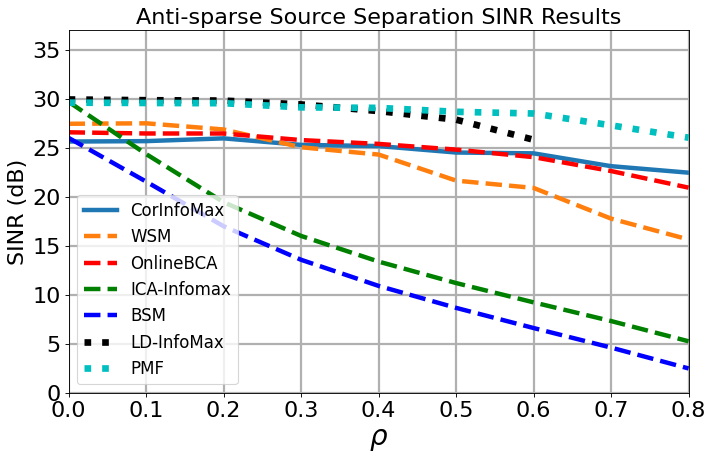

In [14]:
SetPlotRC()

# results = df[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).mean().reset_index()
SINRCorInfoMax = results.loc[results['Model'] == 'CorInfoMax']['SINR'].to_numpy()
SINRCorInfoMax2 = results.loc[results['Model'] == 'CorInfoMax2']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()
SINRBCA = results.loc[results['Model'] == 'OnlineBCA']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRCorInfoMax,linewidth=4, label = "CorInfoMax")
plt.plot(rholist,SINRWSM,'--', linewidth=4, label = "WSM")
# plt.plot(rholist,SINRCorInfoMax2,linewidth=4, label = "CorInfoMax2")
plt.plot(rholist,SINRBCA,'r--',linewidth=4, label = "OnlineBCA")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
plt.plot(rholist[:7],SINRLDMI[:7],'k:',linewidth=6, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'c:',linewidth=6, label = "PMF")
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,37])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
